In [72]:
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import glob
import os
import pandas as pd
import hashlib
import json
from os import listdir
from os.path import isfile, join
import pandas as pd

%matplotlib inline

### json 파일 로딩 함수, 플롯 그리는 함수 정의 

In [70]:
## ===== loading json file as pandas data frame ===== ##
def load_exp_result(filename):
    dir_path = '/share/VGGNet_results'
    list_result = []
    

    with open(join(dir_path, filename), 'r') as infile:
        results = json.load(infile)
        list_result.append(results)
    df = pd.DataFrame(list_result) # .drop(columns=[])

    return df


## ===== plotting loss and accuracy graph together ===== ## 
def plot_loss_acc(df,**kwargs):

    
    train_losses = df['train_losses']
    train_losses = list(train_losses)[0]
    train_losses = train_losses[:30]

    
    val_losses = df['val_losses']
    val_losses = list(val_losses)[0]
    val_losses = val_losses[:30]
    
    train_accs = df['train_accs']
    train_accs = list(train_accs)[0]
    train_accs = train_accs[:30]
    
    val_accs = df['val_accs']
    val_accs = list(val_accs)[0]
    val_accs = val_accs[:30]
    
    ## === making dataframe for loss === ##
    loss_data = []
    
    for epoch,train_loss in enumerate(train_losses,0):
        loss_data.append({'type':'train','loss':train_loss,'epoch':epoch})
    
    for epoch,val_loss in enumerate(val_losses,0):
        loss_data.append({'type':'val','loss':val_loss,'epoch':epoch})
    
    df_loss = pd.DataFrame(loss_data)
    ## ================================== ##

    
    ## === making dataframe for acc === ##
    acc_data = []
    
    for epoch,train_acc in enumerate(train_accs,0):
        acc_data.append({'type':'train','acc':train_acc,'epoch':epoch})
    
    for epoch,val_acc in enumerate(val_accs,0):
        acc_data.append({'type':'val','acc':val_acc,'epoch':epoch})
        
    df_acc = pd.DataFrame(acc_data)
    ## ================================== ##

    
    ## === plotting == ##
    plt.rcParams["figure.figsize"] = (5,3)
    fig, axes = plt.subplots(1,2)
    plt.subplots_adjust(wspace=0.5)

    sns.lineplot(df_loss['epoch'], df_loss['loss'],hue=df_loss['type'],ax=axes[0])
    sns.lineplot(df_acc['epoch'], df_acc['acc'],hue=df_acc['type'],ax=axes[1])
    
    plt.suptitle('model structure is {} \n acc(val/test) is {:.2f}/{:.2f} \n optimizer is {}'.format(df['model_code'][0],df['val_acc'][0],df['test_acc'][0],df['optim'][0]),y=1.2)





### 플롯 그리기

json 파일 형식으로 실험 결과를 저장했다면, 디렉토리만 바꿔주면 됨. 

/share/VGGNet_results/VGGNet_sex_classify-e16c7e.json
/share/VGGNet_results/VGGNet_sex_classify-9279c9.json


/opt/conda/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/conda/lib/python3.8/site-pack

/share/VGGNet_results/VGGNet_sex_classify_trainBatch32_valBatch16_epoch100_ScaleIntensity_dropout_0.8and0.5-db9236.json


/opt/conda/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


/share/VGGNet_results/VGGNet_sex_classify-935467.json


/opt/conda/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


/share/VGGNet_results/VGGNet_sex_classify-d3ea25.json


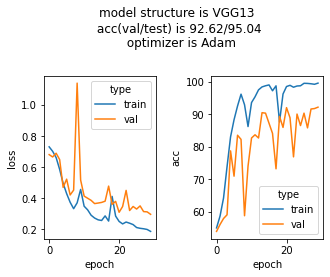

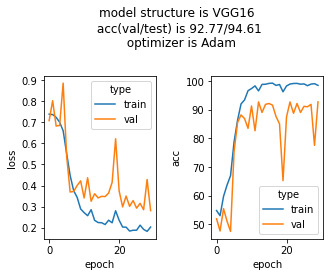

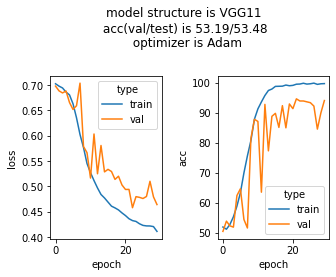

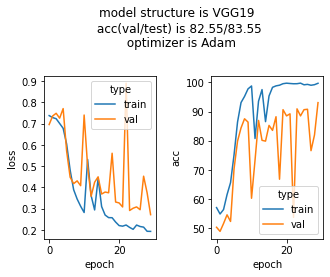

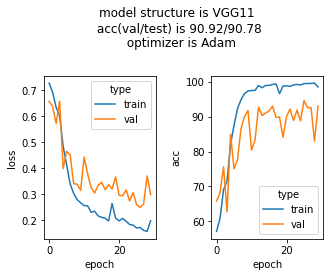

In [71]:
file_list = glob.glob('/share/VGGNet_results/*.json')

for file in file_list:
    df = load_exp_result(file)
    print(file)
    plot_loss_acc(df)

# Ray tune result


ray tune으로 실험한 경우, ray tune이 생성한 파일 안에 있는 result.json 파일을 가져와서 그리면 됨.

/opt/conda/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


91.91489361702128


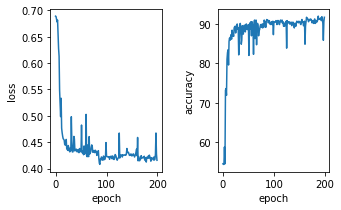

In [75]:
from ast import literal_eval

file_name = '/share/result.json'
with open(file_name, 'r') as infile:
    results = {}
    
    train_losses = []
    train_accs = []
    
    val_losses = []
    val_accs = []
     
    
    lines = infile.readlines()
    
    for line in lines:
        line = json.loads(line)
        
        train_loss = line["train_loss"]
        train_losses.append(train_loss)
        
        train_acc = line["train_acc"]
        train_accs.append(train_acc)
        
        val_loss = line["val_loss"]
        val_losses.append(val_loss)
        
        val_acc = line["val_acc"]
        val_accs.append(val_acc)
        

    loss_data = []
    acc_data = []
    
    for epoch,val_loss in enumerate(val_losses,0):
        loss_data.append({'type':'train','loss':train_loss,'epoch':epoch})
        loss_data.append({'type':'val','loss':val_loss,'epoch':epoch})
    
    df_loss = pd.DataFrame(loss_data)
    
    
    for epoch,val_acc in enumerate(val_accs,0):
        acc_data.append({'type':'train','accuracy':train_acc,'epoch':epoch})
        acc_data.append({'type':'val','accuracy':val_acc,'epoch':epoch})
    
    df_acc = pd.DataFrame(acc_data)
    
    
    
    plt.rcParams["figure.figsize"] = (5,3)
    fig, axes = plt.subplots(1,2)
    plt.subplots_adjust(wspace=0.5)

    sns.lineplot(df_loss['epoch'], df_loss['loss'],hue=df_loss['type'],ax=axes[0])
    sns.lineplot(df_acc['epoch'], df_acc['accuracy'],hue=df_loss['type'],ax=axes[1])
    print(max(df_acc['accuracy']))
    
    